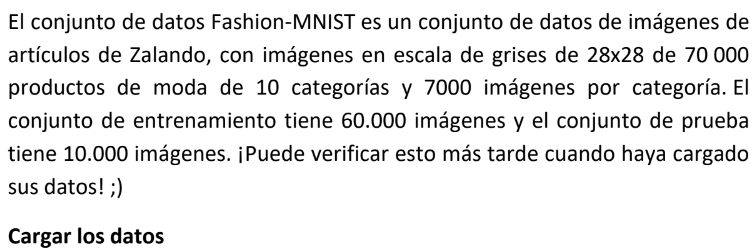

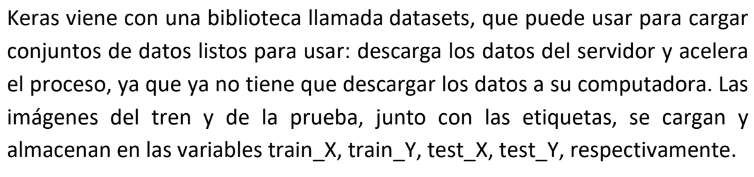

In [58]:
from keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

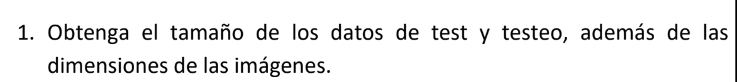

In [59]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


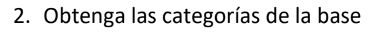

In [60]:
clases = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo','Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

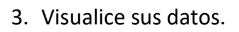

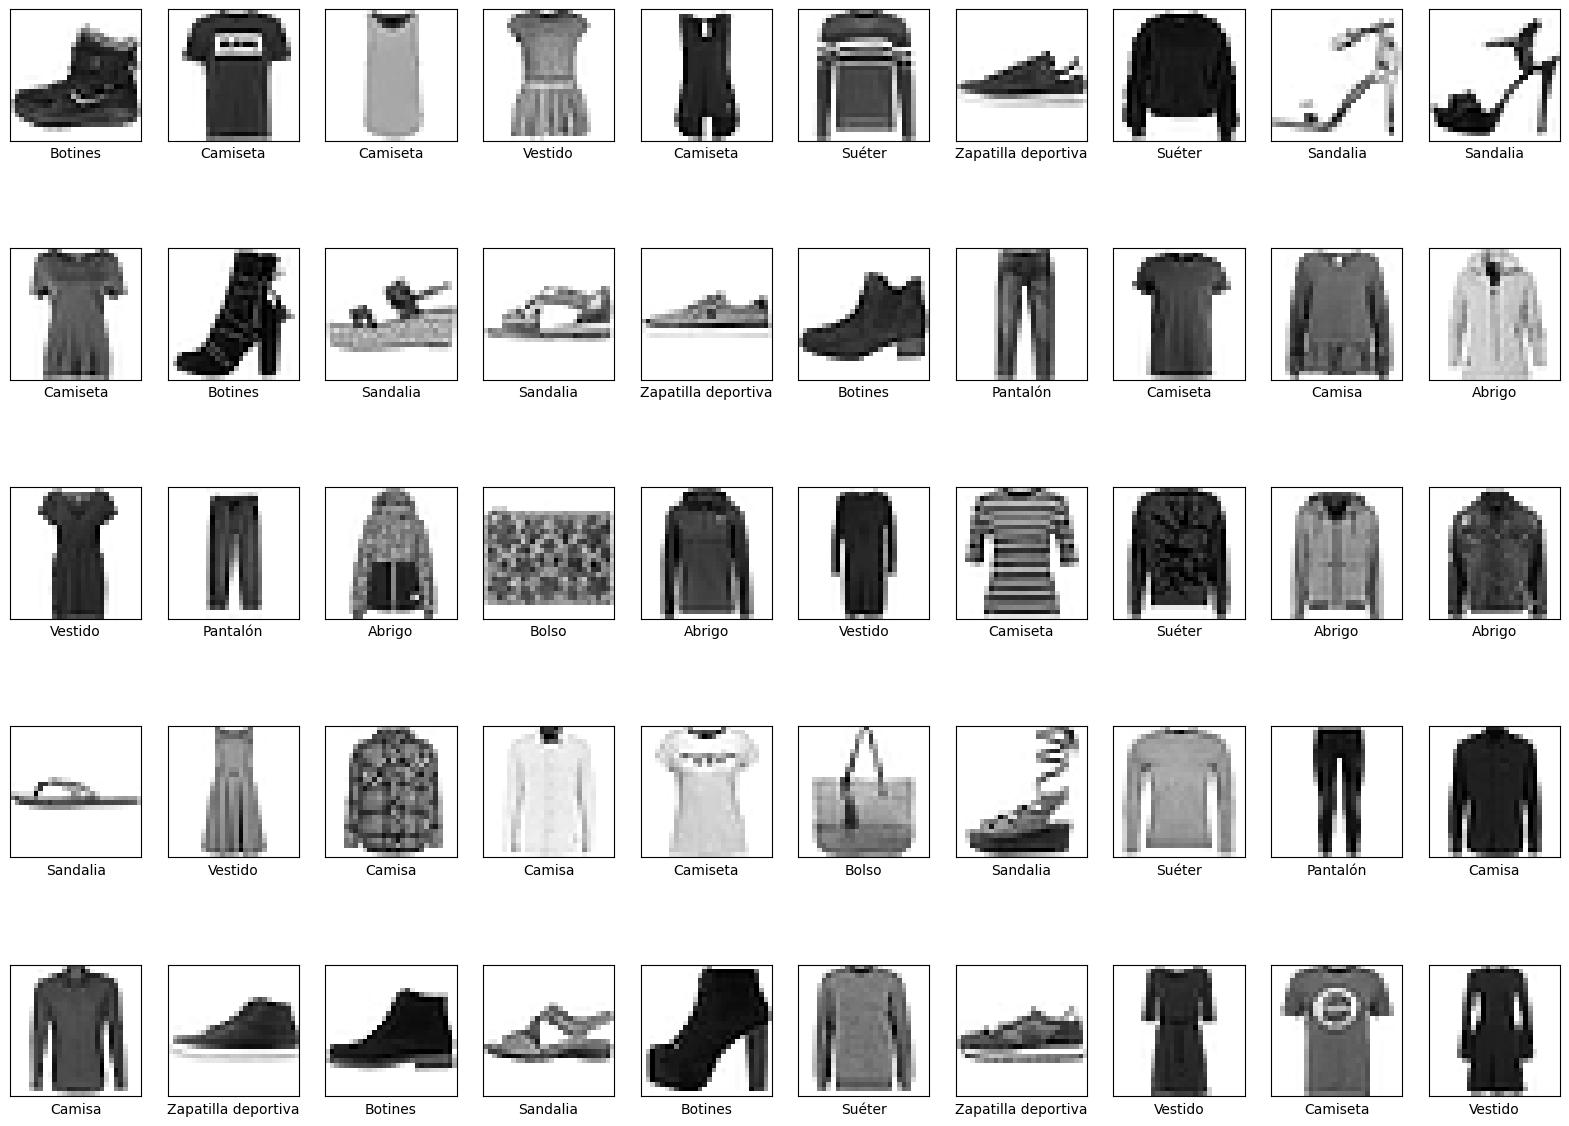

In [61]:
plt.figure(figsize=(20,15))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(clases[train_Y[i]])
plt.show()

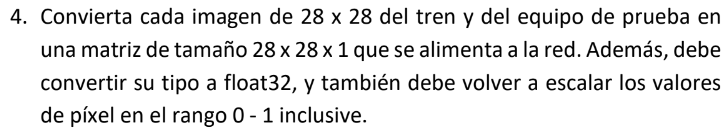

In [62]:
# Cambiar tamaño de matrices
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [63]:
# Castear a float32
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [64]:
# Escalar valores de 0 a 1
train_X = train_X / 255 # 255 es el valor máximo de un pixel
test_X = test_X / 255

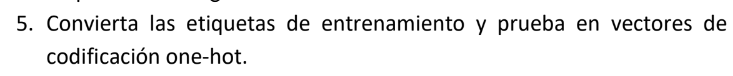

In [65]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [66]:
train_Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

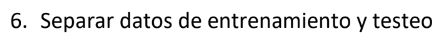

In [67]:
# Realizado en el paso 1

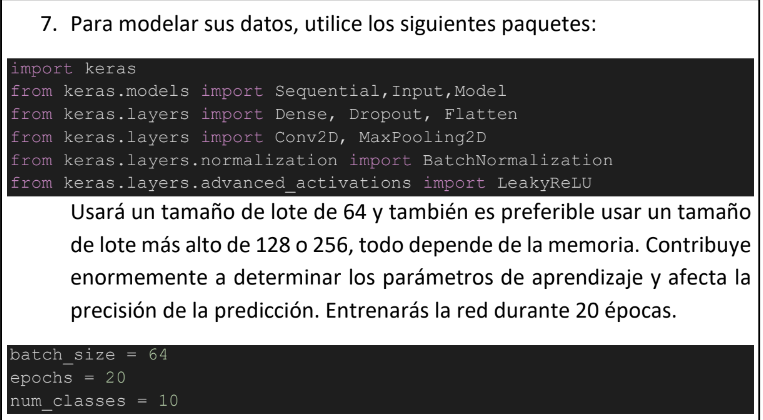

In [68]:
import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

In [69]:
tamaño = 4096 # 64 es muy pequeño y consumo muchos recursos
epocas = 20
num_classes = 10

In [70]:
input_layer = Input(shape=train_X.shape[1:])
flat = Flatten()(input_layer) # el flatten es para convertir la matriz en un vector

# Fully connected layers
dense1 = Dense(128, activation='LeakyReLU')(flat)
dense2 = Dense(64, activation='LeakyReLU')(dense1)
output_layer = Dense(10, activation='softmax')(dense2)

model = Model(input_layer, output_layer)

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(train_X, train_Y, epochs=epocas, validation_split= 0.2 , batch_size=tamaño)

Epoch 1/20
12/12 [==============================] - 1s 28ms/step - loss: 1.6351 - accuracy: 0.4865 - val_loss: 0.9811 - val_accuracy: 0.6779
Epoch 2/20
12/12 [==============================] - 0s 21ms/step - loss: 0.8252 - accuracy: 0.7129 - val_loss: 0.6966 - val_accuracy: 0.7521
Epoch 3/20
12/12 [==============================] - 0s 20ms/step - loss: 0.6517 - accuracy: 0.7753 - val_loss: 0.6044 - val_accuracy: 0.7906
Epoch 4/20
12/12 [==============================] - 0s 18ms/step - loss: 0.5729 - accuracy: 0.8074 - val_loss: 0.5494 - val_accuracy: 0.8113
Epoch 5/20
12/12 [==============================] - 0s 18ms/step - loss: 0.5261 - accuracy: 0.8216 - val_loss: 0.5158 - val_accuracy: 0.8216
Epoch 6/20
12/12 [==============================] - 0s 20ms/step - loss: 0.5006 - accuracy: 0.8289 - val_loss: 0.4919 - val_accuracy: 0.8326
Epoch 7/20
12/12 [==============================] - 0s 18ms/step - loss: 0.4763 - accuracy: 0.8369 - val_loss: 0.4761 - val_accuracy: 0.8362
Epoch 8/20
12

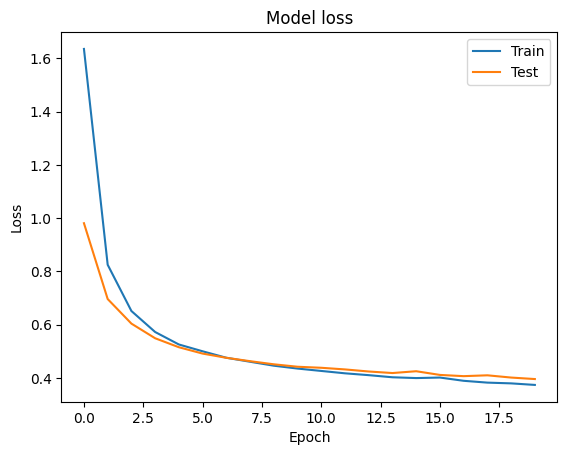

In [74]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

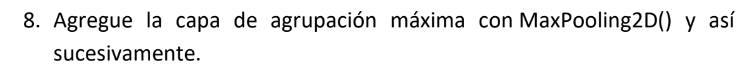

In [75]:
input_layer = Input(shape=train_X.shape[1:])

# Convolutional layers
conv1 = Conv2D(16, kernel_size=3, activation='LeakyReLU')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32, kernel_size=3, activation='LeakyReLU')(pool1)
flat = Flatten()(conv2)

# Fully connected layers
dense1 = Dense(128, activation='LeakyReLU')(flat)
dense2 = Dense(64, activation='LeakyReLU')(dense1)
output_layer = Dense(10, activation='softmax')(dense2)

model2 = Model(input_layer, output_layer)

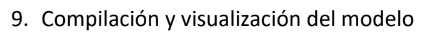

In [76]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
model2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 flatten_6 (Flatten)         (None, 3872)              0         
                                                                 
 dense_21 (Dense)            (None, 128)               495744    
                                                           

In [78]:
history2 = model2.fit(train_X, train_Y, epochs=epocas, validation_data=(test_X, test_Y), batch_size=tamaño)

Epoch 1/20
15/15 [==============================] - 8s 496ms/step - loss: 1.3277 - accuracy: 0.5921 - val_loss: 0.7211 - val_accuracy: 0.7393
Epoch 2/20
15/15 [==============================] - 7s 482ms/step - loss: 0.6415 - accuracy: 0.7612 - val_loss: 0.5809 - val_accuracy: 0.7803
Epoch 3/20
15/15 [==============================] - 8s 504ms/step - loss: 0.5313 - accuracy: 0.8062 - val_loss: 0.5190 - val_accuracy: 0.8163
Epoch 4/20
15/15 [==============================] - 8s 529ms/step - loss: 0.4741 - accuracy: 0.8310 - val_loss: 0.4704 - val_accuracy: 0.8322
Epoch 5/20
15/15 [==============================] - 7s 479ms/step - loss: 0.4372 - accuracy: 0.8445 - val_loss: 0.4440 - val_accuracy: 0.8414
Epoch 6/20
15/15 [==============================] - 8s 548ms/step - loss: 0.4119 - accuracy: 0.8549 - val_loss: 0.4206 - val_accuracy: 0.8493
Epoch 7/20
15/15 [==============================] - 8s 533ms/step - loss: 0.3859 - accuracy: 0.8634 - val_loss: 0.4046 - val_accuracy: 0.8553
Epoch 

In [79]:
# guardar el modelo
model2.save('ejercicio3_7.h5')

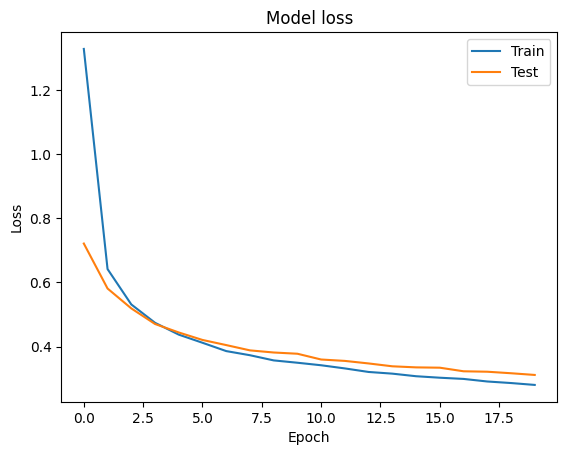

In [80]:
fig, ax = plt.subplots()
ax.plot(history2.history['loss'], label='Train')
ax.plot(history2.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [81]:
pred2 = model2.predict(test_X)


313/313 [==============================] - 1s 3ms/step


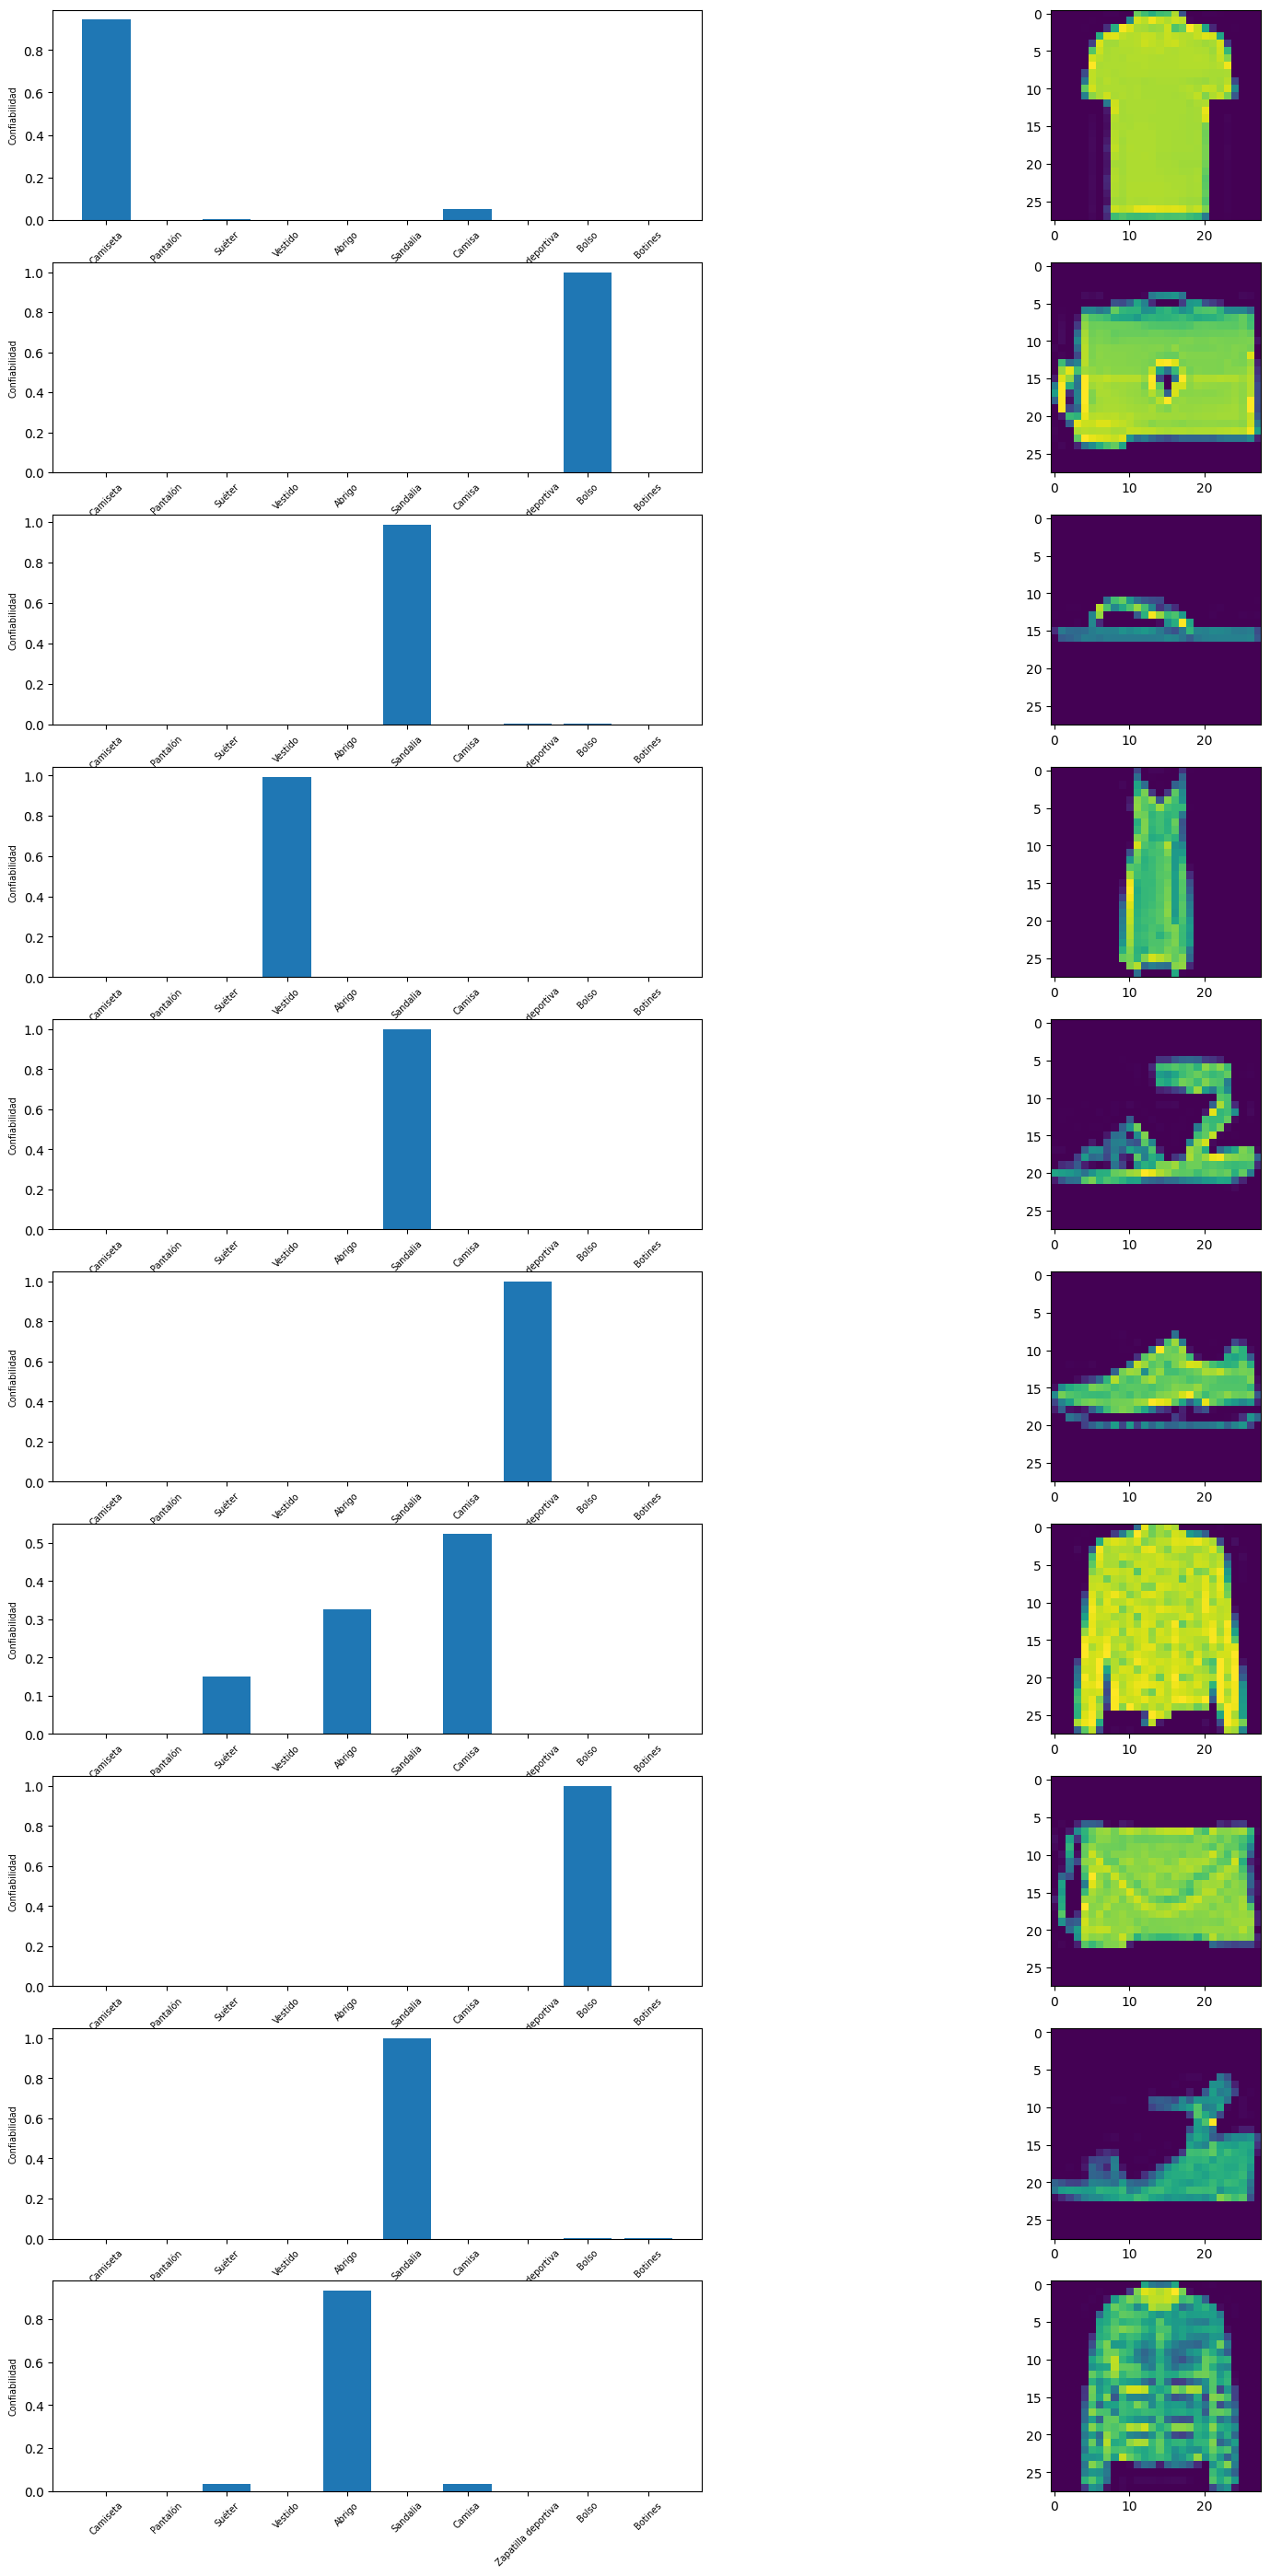

In [82]:
# lista de 10 numeros aleatorios entre 0 y 60000
numeros = random.sample(range(0, 10000), 10)
numeros
fig ,axs = plt.subplots(10,2, figsize=(20,35))

contador = 0
for i in numeros:
    img_predict = pred2[i]
    index = np.arange(len(clases))
    axs[contador,0].bar(index, img_predict)

    axs[contador,0].set_ylabel('Confiabilidad', fontsize=7,rotation=90)
    axs[contador,0].set_xticks(index, clases, fontsize=7, rotation=45)

    axs[contador,1].imshow(test_X[i])
    contador += 1 # para que vaya cambiando de fila en la matriz de subplots
plt.show() 


# Este ciclo for i hace una selección aleatoria de 10 imágenes de test_images y las muestra junto con la predicción de la red neuronal.

In [ ]:
# A modo de conclusión una red convolucional es mucho más eficiente que una red neuronal densa para el reconocimiento de imágenes, con un 0.86 de accuracy en la red 
# densa y un 0.89 para la convolucional.
# Sin emabargo la red convolucional es mucho más lenta en el entrenamiento ya que tiene aproximadamente 5 veces más parámetros que la red densa, por lo que 
# consume mas tiempo de procesamiento y recursos del computador.